In [11]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import gamma, factorial
from sympy.solvers import solve
from scipy.optimize import fsolve

plt.rcParams["animation.html"] = "jshtml"
from matplotlib.animation import FuncAnimation

%matplotlib inline

sns.set(style="darkgrid")

In [12]:
N = 10
T = 1
tau = T / N

y = np.zeros(N + 1)
t = np.linspace(0, T, num = N + 1)

a = 0.75

y0 = 0
y[0] = y0

In [13]:
def f_ch(x, y):
    return (2*x**(2 - a) / gamma(3 - a))

In [19]:
for i in range(0, N):
    sm = 0
    for s in range(0, i - 1):
        sm += (t[i - s + 1]**(1 - a) - t[i - s]**(1 - a)) * (y[s + 1] - y[s])
    g = lambda p: p - 1 / (t[1]**(1 - a) - t[0]**(1 - a)) * (gamma(2 - a) * tau * f_ch(t[i + 1], p) - sm) + y[i]
    res = fsolve(g, 0)
    y[i + 1] = res

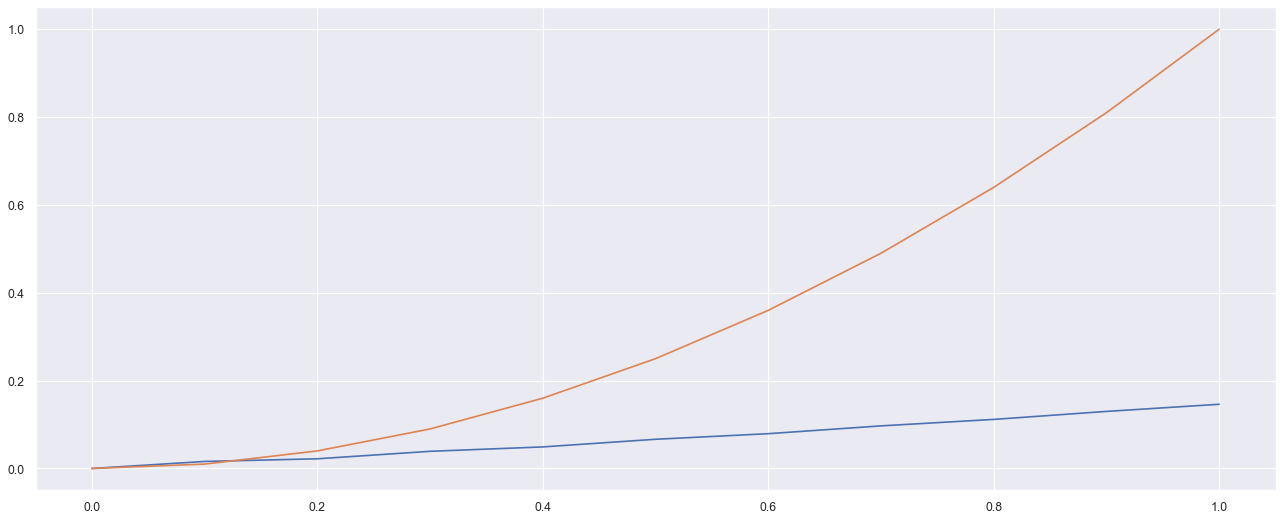

In [21]:
plt.figure(figsize = (20,8), dpi = 80)
plt.plot(t, y)
plt.plot(t, t**2)